In [77]:
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import interp2d
warnings.filterwarnings('ignore')
#import datetime
import scipy.ndimage as ndimage
from matplotlib import cm
import geopy.distance
#import matplotlib as mpl
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import leafmap
import plotly.express as px
import matplotlib as mpl
import xarray as xr
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.stats import gaussian_kde
from matplotlib.lines import Line2D
#import pysplit

In [34]:
csv_file_path = 'C:/Users/taiwoajayi/OneDrive - University of Arizona/git/measurements_1948.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, sep = ',', skiprows=0)

df['dateUtc'] = pd.to_datetime(df['dateUtc'], format="%Y-%m-%dT%H:%M:%S%z")
df['dateLocal'] = pd.to_datetime(df['dateLocal'], format="%Y-%m-%dT%H:%M:%S%z")

df

,locationId,location,parameter,value,dateUtc,dateLocal,unit,latitude,longitude,country,city,isMobile,isAnalysis,entity,sensorType
0,1948,Compton,o3,0.015,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
1,1948,Compton,pm25,9.300,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
2,1948,Compton,no2,0.019,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
3,1948,Compton,co,0.300,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
4,1948,Compton,pm25,8.300,2022-12-30 23:00:00+00:00,2022-12-30 15:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1948,Compton,o3,0.001,2022-12-19 12:00:00+00:00,2022-12-19 04:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
996,1948,Compton,co,2.000,2022-12-19 12:00:00+00:00,2022-12-19 04:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
997,1948,Compton,pm25,30.600,2022-12-19 12:00:00+00:00,2022-12-19 04:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
998,1948,Compton,pm25,39.000,2022-12-19 11:00:00+00:00,2022-12-19 03:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade


In [55]:
csv_file_path = 'C:/Users/taiwoajayi/OneDrive - University of Arizona/git/measurements_1200.csv'

# Read the CSV file into a pandas DataFrame
df2 = pd.read_csv(csv_file_path, sep = ',', skiprows=0)

df2['dateUtc'] = pd.to_datetime(df2['dateUtc'], format="%Y-%m-%dT%H:%M:%S%z")
df2['dateLocal'] = pd.to_datetime(df2['dateLocal'], format="%Y-%m-%dT%H:%M:%S%z")

df2

,locationId,location,parameter,value,dateUtc,dateLocal,unit,latitude,longitude,country,city,isMobile,isAnalysis,entity,sensorType
0,1200,Glendora - Laurel,co,0.2000,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
1,1200,Glendora - Laurel,o3,0.0240,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
2,1200,Glendora - Laurel,pm10,18.0000,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
3,1200,Glendora - Laurel,pm25,3.8000,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
4,1200,Glendora - Laurel,no2,0.0085,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1200,Glendora - Laurel,co,0.3000,2022-12-21 17:00:00+00:00,2022-12-21 09:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
996,1200,Glendora - Laurel,pm25,3.9000,2022-12-21 17:00:00+00:00,2022-12-21 09:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
997,1200,Glendora - Laurel,no2,0.0173,2022-12-21 17:00:00+00:00,2022-12-21 09:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
998,1200,Glendora - Laurel,pm10,19.0000,2022-12-21 17:00:00+00:00,2022-12-21 09:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade


In [28]:
# Extract rows where 'parameter' column contains 'co'
CO = df[df['parameter'].str.contains('co', case=False)]

# Display the result
CO


,locationId,location,parameter,value,dateUtc,dateLocal,unit,latitude,longitude,country,city,isMobile,isAnalysis,entity,sensorType
3,1948,Compton,co,0.3,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
7,1948,Compton,co,0.3,2022-12-30 23:00:00+00:00,2022-12-30 15:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
8,1948,Compton,co,0.2,2022-12-30 22:00:00+00:00,2022-12-30 14:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
14,1948,Compton,co,0.2,2022-12-30 21:00:00+00:00,2022-12-30 13:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
17,1948,Compton,co,0.2,2022-12-30 20:00:00+00:00,2022-12-30 12:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,1948,Compton,co,1.4,2022-12-19 16:00:00+00:00,2022-12-19 08:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
984,1948,Compton,co,2.6,2022-12-19 15:00:00+00:00,2022-12-19 07:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
989,1948,Compton,co,2.0,2022-12-19 14:00:00+00:00,2022-12-19 06:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
993,1948,Compton,co,2.0,2022-12-19 13:00:00+00:00,2022-12-19 05:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade


In [56]:
# Extract rows where 'parameter' column contains 'co'
CO_v = df2[df2['parameter'].str.contains('co', case=False)]

# Display the result
CO_v


,locationId,location,parameter,value,dateUtc,dateLocal,unit,latitude,longitude,country,city,isMobile,isAnalysis,entity,sensorType
0,1200,Glendora - Laurel,co,0.2,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
8,1200,Glendora - Laurel,co,0.2,2022-12-30 23:00:00+00:00,2022-12-30 15:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
13,1200,Glendora - Laurel,co,0.2,2022-12-30 22:00:00+00:00,2022-12-30 14:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
17,1200,Glendora - Laurel,co,0.2,2022-12-30 21:00:00+00:00,2022-12-30 13:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
20,1200,Glendora - Laurel,co,0.2,2022-12-30 20:00:00+00:00,2022-12-30 12:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,1200,Glendora - Laurel,co,0.2,2022-12-21 21:00:00+00:00,2022-12-21 13:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
980,1200,Glendora - Laurel,co,0.2,2022-12-21 20:00:00+00:00,2022-12-21 12:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
988,1200,Glendora - Laurel,co,0.2,2022-12-21 19:00:00+00:00,2022-12-21 11:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
990,1200,Glendora - Laurel,co,0.3,2022-12-21 18:00:00+00:00,2022-12-21 10:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade


In [29]:
# Extract rows where 'parameter' column contains 'co'
PM25 = df[df['parameter'].str.contains('pm25', case=False)]

# Display the result
PM25

,locationId,location,parameter,value,dateUtc,dateLocal,unit,latitude,longitude,country,city,isMobile,isAnalysis,entity,sensorType
1,1948,Compton,pm25,9.3,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
4,1948,Compton,pm25,8.3,2022-12-30 23:00:00+00:00,2022-12-30 15:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
11,1948,Compton,pm25,4.4,2022-12-30 22:00:00+00:00,2022-12-30 14:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
13,1948,Compton,pm25,1.9,2022-12-30 21:00:00+00:00,2022-12-30 13:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
19,1948,Compton,pm25,7.4,2022-12-30 20:00:00+00:00,2022-12-30 12:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1948,Compton,pm25,27.3,2022-12-19 15:00:00+00:00,2022-12-19 07:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
987,1948,Compton,pm25,30.7,2022-12-19 14:00:00+00:00,2022-12-19 06:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
992,1948,Compton,pm25,30.6,2022-12-19 13:00:00+00:00,2022-12-19 05:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
997,1948,Compton,pm25,30.6,2022-12-19 12:00:00+00:00,2022-12-19 04:00:00-08:00,µg/m³,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade


In [58]:
# Extract rows where 'parameter' column contains 'co'
PM25_v = df2[df2['parameter'].str.contains('pm25', case=False)]

# Display the result
PM25_v

,locationId,location,parameter,value,dateUtc,dateLocal,unit,latitude,longitude,country,city,isMobile,isAnalysis,entity,sensorType
3,1200,Glendora - Laurel,pm25,3.8,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
6,1200,Glendora - Laurel,pm25,2.7,2022-12-30 23:00:00+00:00,2022-12-30 15:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
11,1200,Glendora - Laurel,pm25,1.4,2022-12-30 22:00:00+00:00,2022-12-30 14:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
19,1200,Glendora - Laurel,pm25,1.9,2022-12-30 21:00:00+00:00,2022-12-30 13:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
21,1200,Glendora - Laurel,pm25,4.6,2022-12-30 20:00:00+00:00,2022-12-30 12:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,1200,Glendora - Laurel,pm25,2.5,2022-12-21 21:00:00+00:00,2022-12-21 13:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
981,1200,Glendora - Laurel,pm25,3.0,2022-12-21 20:00:00+00:00,2022-12-21 12:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
985,1200,Glendora - Laurel,pm25,8.4,2022-12-21 19:00:00+00:00,2022-12-21 11:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
991,1200,Glendora - Laurel,pm25,9.6,2022-12-21 18:00:00+00:00,2022-12-21 10:00:00-08:00,µg/m³,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade


In [30]:
# Extract rows where 'parameter' column contains 'co'
O3 = df[df['parameter'].str.contains('o3', case=False)]

# Display the result
O3

,locationId,location,parameter,value,dateUtc,dateLocal,unit,latitude,longitude,country,city,isMobile,isAnalysis,entity,sensorType
0,1948,Compton,o3,0.015,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
6,1948,Compton,o3,0.016,2022-12-30 23:00:00+00:00,2022-12-30 15:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
9,1948,Compton,o3,0.018,2022-12-30 22:00:00+00:00,2022-12-30 14:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
12,1948,Compton,o3,0.019,2022-12-30 21:00:00+00:00,2022-12-30 13:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
18,1948,Compton,o3,0.020,2022-12-30 20:00:00+00:00,2022-12-30 12:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,1948,Compton,o3,0.001,2022-12-19 15:00:00+00:00,2022-12-19 07:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
986,1948,Compton,o3,0.000,2022-12-19 14:00:00+00:00,2022-12-19 06:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
991,1948,Compton,o3,0.001,2022-12-19 13:00:00+00:00,2022-12-19 05:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
995,1948,Compton,o3,0.001,2022-12-19 12:00:00+00:00,2022-12-19 04:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade


In [59]:
# Extract rows where 'parameter' column contains 'co'
O3_v = df2[df2['parameter'].str.contains('o3', case=False)]

# Display the result
O3_v


,locationId,location,parameter,value,dateUtc,dateLocal,unit,latitude,longitude,country,city,isMobile,isAnalysis,entity,sensorType
1,1200,Glendora - Laurel,o3,0.024,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
7,1200,Glendora - Laurel,o3,0.026,2022-12-30 23:00:00+00:00,2022-12-30 15:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
14,1200,Glendora - Laurel,o3,0.029,2022-12-30 22:00:00+00:00,2022-12-30 14:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
16,1200,Glendora - Laurel,o3,0.027,2022-12-30 21:00:00+00:00,2022-12-30 13:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
24,1200,Glendora - Laurel,o3,0.027,2022-12-30 20:00:00+00:00,2022-12-30 12:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,1200,Glendora - Laurel,o3,0.036,2022-12-21 20:00:00+00:00,2022-12-21 12:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
987,1200,Glendora - Laurel,o3,0.029,2022-12-21 19:00:00+00:00,2022-12-21 11:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
993,1200,Glendora - Laurel,o3,0.025,2022-12-21 18:00:00+00:00,2022-12-21 10:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
994,1200,Glendora - Laurel,o3,0.022,2022-12-21 17:00:00+00:00,2022-12-21 09:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade


In [35]:
# Extract rows where 'parameter' column contains 'co'
NO2 = df[df['parameter'].str.contains('no2', case=False)]

# Display the result
NO2

,locationId,location,parameter,value,dateUtc,dateLocal,unit,latitude,longitude,country,city,isMobile,isAnalysis,entity,sensorType
2,1948,Compton,no2,0.0190,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
5,1948,Compton,no2,0.0173,2022-12-30 23:00:00+00:00,2022-12-30 15:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
10,1948,Compton,no2,0.0154,2022-12-30 22:00:00+00:00,2022-12-30 14:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
15,1948,Compton,no2,0.0155,2022-12-30 21:00:00+00:00,2022-12-30 13:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
16,1948,Compton,no2,0.0128,2022-12-30 20:00:00+00:00,2022-12-30 12:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1948,Compton,no2,0.0357,2022-12-19 16:00:00+00:00,2022-12-19 08:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
983,1948,Compton,no2,0.0297,2022-12-19 15:00:00+00:00,2022-12-19 07:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
988,1948,Compton,no2,0.0246,2022-12-19 14:00:00+00:00,2022-12-19 06:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade
990,1948,Compton,no2,0.0210,2022-12-19 13:00:00+00:00,2022-12-19 05:00:00-08:00,ppm,33.9014,-118.205,US,NaN,False,NaN,Governmental Organization,reference grade


In [60]:
# Extract rows where 'parameter' column contains 'co'
NO2_v = df2[df2['parameter'].str.contains('no2', case=False)]

# Display the result
NO2_v

,locationId,location,parameter,value,dateUtc,dateLocal,unit,latitude,longitude,country,city,isMobile,isAnalysis,entity,sensorType
4,1200,Glendora - Laurel,no2,0.0085,2022-12-31 00:00:00+00:00,2022-12-30 16:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
5,1200,Glendora - Laurel,no2,0.0098,2022-12-30 23:00:00+00:00,2022-12-30 15:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
10,1200,Glendora - Laurel,no2,0.0083,2022-12-30 22:00:00+00:00,2022-12-30 14:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
18,1200,Glendora - Laurel,no2,0.0086,2022-12-30 21:00:00+00:00,2022-12-30 13:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
22,1200,Glendora - Laurel,no2,0.0071,2022-12-30 20:00:00+00:00,2022-12-30 12:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,1200,Glendora - Laurel,no2,0.0090,2022-12-21 21:00:00+00:00,2022-12-21 13:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
979,1200,Glendora - Laurel,no2,0.0099,2022-12-21 20:00:00+00:00,2022-12-21 12:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
984,1200,Glendora - Laurel,no2,0.0152,2022-12-21 19:00:00+00:00,2022-12-21 11:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade
989,1200,Glendora - Laurel,no2,0.0161,2022-12-21 18:00:00+00:00,2022-12-21 10:00:00-08:00,ppm,34.1439,-117.8508,US,NaN,False,NaN,Governmental Organization,reference grade


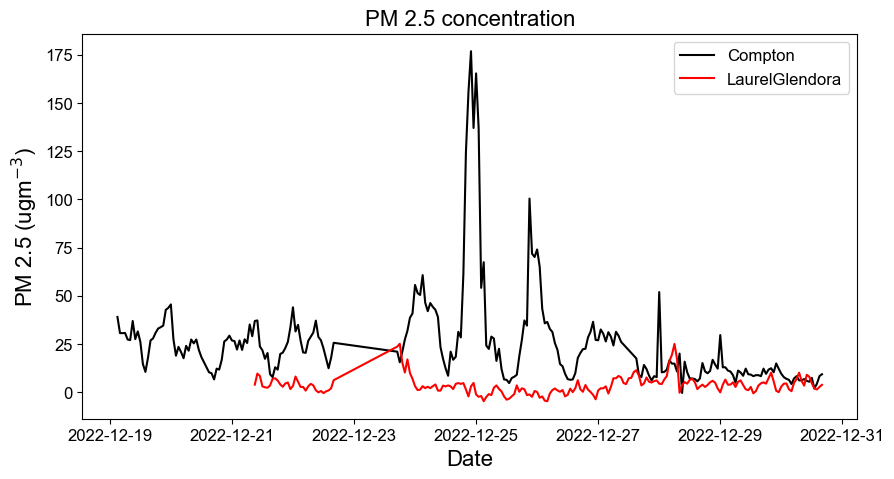

In [64]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12


# Plot the annual zonal mean with latitude on the x-axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(PM25['dateLocal'], PM25['value'], label = 'Compton', color='k')
ax.plot(PM25_v['dateLocal'], PM25_v['value'], label = 'LaurelGlendora', color='r')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('PM 2.5 (ugm$^{-3}$)', fontsize=16, color = 'k')
plt.title('PM 2.5 concentration', fontsize=16)
ax.tick_params(axis='y',colors='k')
plt.legend()
#plt.grid(False, which='major',linestyle='--')
plt.show()

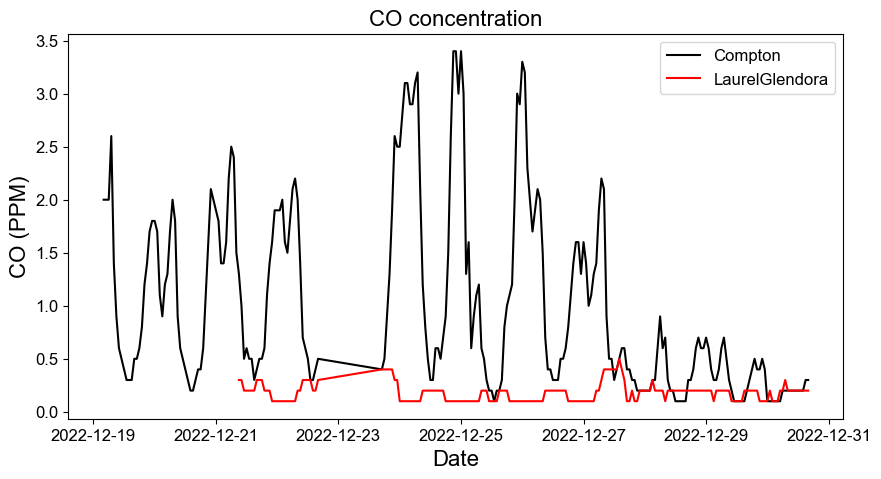

In [65]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12


# Plot the annual zonal mean with latitude on the x-axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(CO['dateLocal'], CO['value'], label = 'Compton', color='k')
ax.plot(CO_v['dateLocal'], CO_v['value'], label = 'LaurelGlendora', color='r')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('CO (PPM)', fontsize=16, color = 'k')
plt.title('CO concentration', fontsize=16)
ax.tick_params(axis='y',colors='k')
plt.legend()
#plt.grid(False, which='major',linestyle='--')
plt.show()

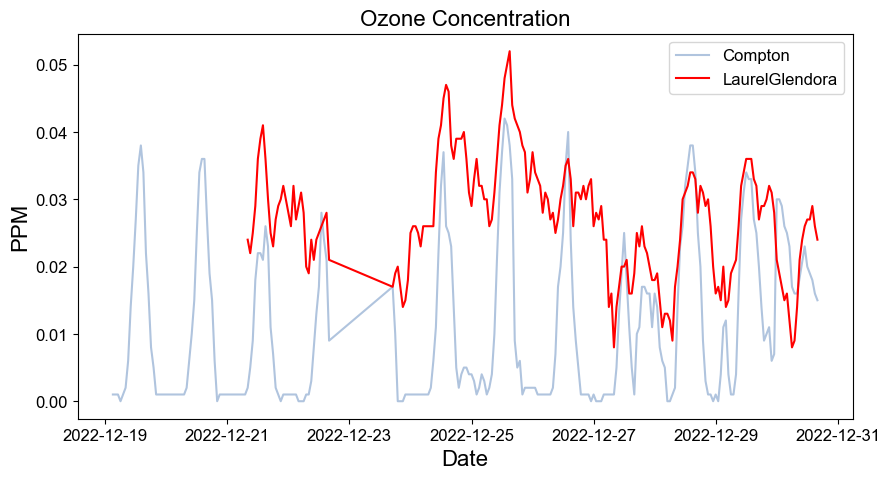

In [68]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12


# Plot the annual zonal mean with latitude on the x-axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(O3['dateLocal'], O3['value'], label = 'Compton', color='lightsteelblue')
ax.plot(O3_v['dateLocal'], O3_v['value'], label = 'LaurelGlendora', color='r')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('PPM', fontsize=16, color = 'k')
plt.title('Ozone Concentration', fontsize=16)
ax.tick_params(axis='y',colors='k')
plt.legend()
#plt.grid(False, which='major',linestyle='--')
plt.show()

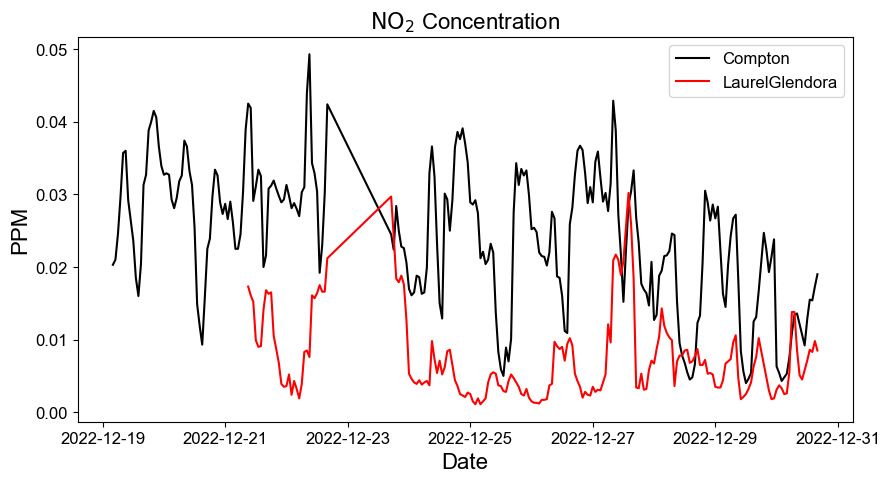

In [112]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12


# Plot the annual zonal mean with latitude on the x-axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(NO2['dateLocal'], NO2['value'], label = 'Compton', color='k')
ax.plot(NO2_v['dateLocal'], NO2_v['value'], label = 'LaurelGlendora', color='r')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('PPM', fontsize=16, color = 'k')
plt.title('$\mathrm{NO_{2}}$ Concentration', fontsize=16)
ax.tick_params(axis='y',colors='k')
plt.legend()
#plt.grid(False, which='major',linestyle='--')
plt.show()

In [75]:
# Reduce the number of rows in x to match the size of y
num_rows_to_keep = len(NO2['value'])
Oo = O3['value'][:num_rows_to_keep]
Oo

0      0.015
6      0.016
9      0.018
12     0.019
18     0.020
       ...  
981    0.002
982    0.001
986    0.000
991    0.001
995    0.001
Name: value, Length: 251, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


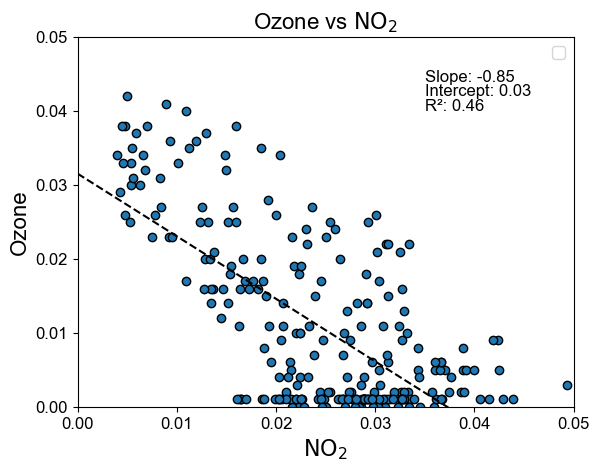

In [111]:
# Create a scatter plot with two distinct colors and markers
plt.scatter(NO2['value'], Oo, marker='o', edgecolors='black')

# Perform linear regression to get the trendline
X = NO2['value'].values.reshape(-1, 1)
y = Oo.values
reg = LinearRegression().fit(X, y)

# Plot the trendline
x_fit = np.linspace(0, 1, 50)
y_fit = reg.predict(x_fit.reshape(-1, 1))
plt.plot(x_fit, y_fit, color='k', linestyle='--')
# Add text annotations for intercept and regression values
intercept_text = f'Intercept: {reg.intercept_:.2f}'
slope_text = f'Slope: {reg.coef_[0]:.2f}'
# Calculate R-squared value
r_squared = reg.score(X, y)
r_squared_text = f'R²: {r_squared:.2f}'
plt.text(0.035, 0.040, r_squared_text, fontsize=12, color='k')
plt.text(0.035, 0.042, intercept_text, fontsize=12, color='k')
plt.text(0.035, 0.044, slope_text, fontsize=12, color='k')
plt.ylim(0, 0.05)
plt.xlim(0, 0.05)
# Set the title and labels for the axes
plt.title("Ozone vs $\mathrm{NO_{2}}$", fontsize=16)
plt.xlabel(r'$\mathrm{NO_{2}}$', fontsize=16)
plt.ylabel("Ozone", fontsize=16)
# Set tick label sizes for both x and y axes
plt.xticks(fontsize=12)  # Set tick label size for x-axis
plt.yticks(fontsize=12)  # Set tick label size for y-axis
# Add the custom legends to the plot
plt.legend()

# Display the plot
plt.show()
